# install packages

In [1]:
#!pip install -Iv rpy2==3.0.0

In [2]:
#import rpy2.robjects.packages as rpackages
#utils = rpackages.importr('utils')

In [3]:
#utils.chooseCRANmirror(ind = 1)
#utils.install_packages("shapes")

In [4]:
import rpy2
import rpy2.robjects as robj
from rpy2.robjects.packages import importr
import rpy2.robjects.numpy2ri
rpy2.robjects.numpy2ri.activate()

Unable to determine R library path: Command '('C:\\PROGRA~1\\R\\R-41~1.3\\bin\\Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 1.


# data preprocessing

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import cv2

# connecting to google drive and importing into google colab

In [6]:
os.getcwd()

'h:\\mega\\university files(allameh)\\term6\\deeplearning'

In [7]:
os.chdir("H:\data\LVQuan19\TrainingData_LVQuan19")

# reading functions

In [8]:
my_files = np.array(os.listdir())
my_files = my_files[[i.endswith(".mat") for i in my_files]]

In [9]:
# finding the center and crop to images 
def find_roi(img,epi,endo,img_size = (128,128)):
  cx_size= img_size[0]/2
  cy_size = img_size[1]/2
  M = cv2.moments(endo)
  cx = M["m10"]/M["m00"]
  cy = M["m01"]/M["m00"]
  center = (cx,cy)
  cx01 = np.round(cx-cx_size).astype("int")
  cx02 = np.round(cx+cx_size).astype("int")
  cy01 = np.round(cy-cy_size).astype("int")
  cy02 = np.round(cy+cy_size).astype("int")
  img2 = img[cx01:cx02,cy01:cy02]
  epi2 = epi[cx01:cx02,cy01:cy02]
  endo2 = endo[cx01:cx02,cy01:cy02]
  return img2,epi2,endo2,center


In [10]:
## example
df_file = loadmat(my_files[0])
img = df_file["image"][:,:,0]
epi = df_file["epi"][:,:,0]
endo = df_file["endo"][:,:,0]
img2,epi2,endo2,_ = find_roi(img,epi,endo)
img2.shape

(128, 128)

In [11]:
# use find_roi for multiple images
def find_roi2(img,epi,endo,img_size = (128,128)):
  n = img.shape[2]
  df_image = np.zeros((*img_size,n))
  df_epi = np.zeros((*img_size,n))
  df_endo = np.zeros((*img_size,n))
  for i in range(n):
    img2,epi2,endo2,_ = find_roi(img[:,:,i],epi[:,:,i],endo[:,:,i],img_size =img_size)
    df_image[:,:,i] = img2
    df_epi[:,:,i] = epi2
    df_endo[:,:,i] = endo2
  
  return df_image,df_epi,df_endo


In [12]:
# example
df_file = loadmat(my_files[0])
img = df_file["image"]
epi = df_file["epi"]
endo = df_file["endo"]
img2,epi2,endo2= find_roi2(img,epi,endo)
img2.shape

(128, 128, 20)

In [13]:
def read_from_file(df_file,frame = 0,img_size = (256,256),crop = True):
    img = df_file["image"][:,:,frame]
    epi = df_file["epi"][:,:,frame]
    endo = df_file["endo"][:,:,frame]
    if img.shape[0] != img_size[0]:
        # n = img.shape[2]
        img = cv2.resize(img,img_size)
        epi = cv2.resize(epi,img_size)
        endo = cv2.resize(endo,img_size)
    if crop:
        img_size = np.array(img_size)/2
        img_size = img_size.astype("int")
        img_size = tuple(img_size)
        img, epi, endo,_ = find_roi(img,epi,endo,img_size)
    if img.max()>255:
        img =img/ img.max()
        img =img* 255
    return img,epi,endo

In [14]:
df_file = my_files[0]
df_file = loadmat(df_file)
img,epi,endo = read_from_file(df_file)

print(img.shape)
print(epi.shape)
print(endo.shape)

(128, 128)
(128, 128)
(128, 128)


In [15]:
def read_from_files(files,frame = 0,img_size = (256,256),crop = True):
    if crop:
        img_size2 = tuple(np.array(np.array(img_size)/2).astype("int"))
    else:
        img_size2 = img_size
    img = np.array([]).reshape((*img_size2,0))
    epi = np.array([]).reshape((*img_size2,0))
    endo = np.array([]).reshape((*img_size2,0))
    print(img.shape)
    for file_name in files:
        print(file_name)
        f = loadmat(file_name)
        im,ep,en = read_from_file(f,frame = frame,img_size = img_size,crop = crop)
        im = im[:,:,np.newaxis]
        ep = ep[:,:,np.newaxis]
        en = en[:,:,np.newaxis]
        img = np.c_[img,im]
        epi = np.c_[epi,ep]
        endo = np.c_[endo,en]

    return img,epi,endo

In [16]:
img,epi,endo = read_from_file(loadmat(my_files[0]),img_size = (256,256),crop = True)
img.shape

(128, 128)

In [17]:
img_size = (256,256)
crop = False
img,epi,endo = read_from_file(loadmat("patient1.mat"),img_size = img_size,crop = crop)
print(img.shape)
print(epi.shape)
print(endo.shape)

(256, 256)
(256, 256)
(256, 256)


(128, 128, 0)
patient1.mat
patient10.mat
patient11.mat
patient12.mat
patient13.mat
patient14.mat
patient15.mat
patient16.mat
patient17.mat
patient18.mat
patient19.mat
patient2.mat
patient20.mat
patient21.mat
patient22.mat
patient23.mat
patient24.mat
patient25.mat
patient26.mat
patient27.mat
patient28.mat
patient29.mat
patient3.mat
patient30.mat
patient31.mat
patient32.mat
patient33.mat
patient34.mat
patient35.mat
patient36.mat
patient37.mat
patient38.mat
patient39.mat
patient4.mat
patient40.mat
patient41.mat
patient42.mat
patient43.mat
patient44.mat
patient45.mat
patient46.mat
patient47.mat
patient48.mat
patient49.mat
patient5.mat
patient50.mat
patient51.mat
patient52.mat
patient53.mat
patient54.mat
patient55.mat
patient56.mat
patient6.mat
patient7.mat
patient8.mat
patient9.mat


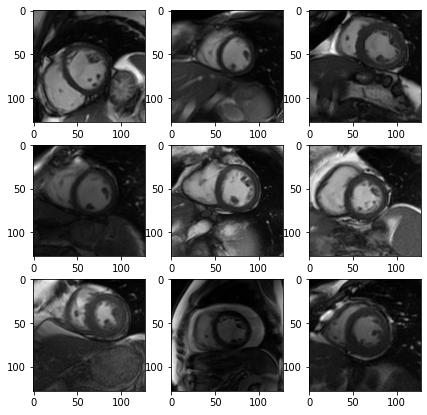

In [18]:
img,epi,endo = read_from_files(my_files,frame = 0)
plt.figure(figsize = (7,7))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(img[:,:,i],cmap = "gray")

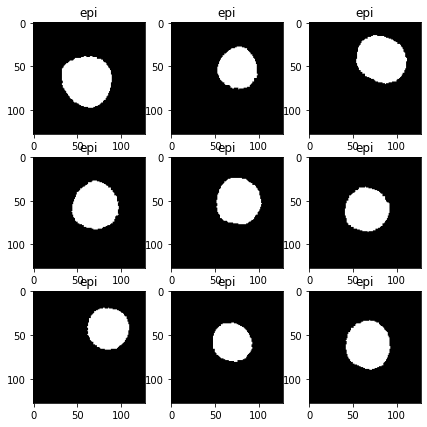

In [19]:
plt.figure(figsize = (7,7))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(epi[:,:,i],cmap = "gray")
    plt.title("epi")

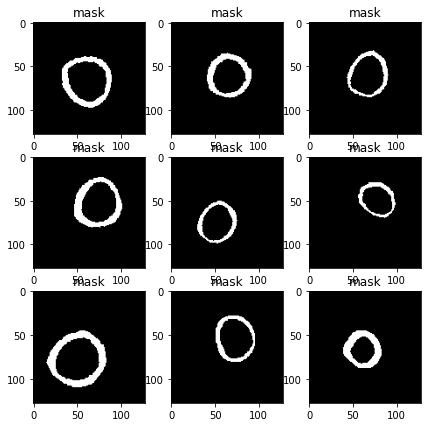

In [20]:
plt.figure(figsize = (7,7))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(epi[:,:,i*5] - endo[:,:,i*5],cmap = "gray")
    plt.title("mask")

# train, validation, test

In [21]:
my_files = np.array(os.listdir())
my_files = my_files[[i.endswith(".mat") for i in my_files]]
n_people = len(my_files)

In [22]:
n_train =np.array([n_people * 0.7]).astype("int")[0] # for training
n_valid = np.array([n_people * 0.15]).astype("int")[0] # for validation
n_test = np.array([n_people * 0.15]).astype("int")[0]

print(f"train size: {n_train},   validation size: {n_valid},     test size: {n_test}")

train size: 39,   validation size: 8,     test size: 8


In [23]:
np.random.seed(1)
rand_choices = np.random.choice(n_people, size = n_train,replace = False)
x = np.arange(n_people)
x = x[~np.isin(x,rand_choices)]
np.random.seed(2)
rand_valid = np.random.choice(x,replace = False,size = n_valid)
rand_valid
x = x[~np.isin(x,rand_valid)]
rand_test = x
#------------------
print(rand_choices)
print(rand_valid)
print(rand_test)

[44  2 46 19 32 33 36 39 49 42 48 21 38 41 10  3 24 52 35 26 45 54 27 34
 13 22 47 30 17 51 31 23  4 14 29 28 50 40 18]
[25  7  8  0 15  6  1 16]
[ 5  9 11 12 20 37 43 53 55]


In [24]:
# train
img_train,epi_train,endo_train = read_from_files(my_files[rand_choices],frame = 0)

# validation
img_valid,epi_valid,endo_valid = read_from_files(my_files[rand_valid],frame = 0)

# test
img_test,epi_test,endo_test = read_from_files(my_files[rand_test], frame = 0)

(128, 128, 0)
patient5.mat
patient11.mat
patient51.mat
patient27.mat
patient39.mat
patient4.mat
patient42.mat
patient45.mat
patient54.mat
patient48.mat
patient53.mat
patient29.mat
patient44.mat
patient47.mat
patient19.mat
patient12.mat
patient31.mat
patient6.mat
patient41.mat
patient33.mat
patient50.mat
patient8.mat
patient34.mat
patient40.mat
patient21.mat
patient3.mat
patient52.mat
patient37.mat
patient25.mat
patient56.mat
patient38.mat
patient30.mat
patient13.mat
patient22.mat
patient36.mat
patient35.mat
patient55.mat
patient46.mat
patient26.mat
(128, 128, 0)
patient32.mat
patient16.mat
patient17.mat
patient1.mat
patient23.mat
patient15.mat
patient10.mat
patient24.mat
(128, 128, 0)
patient14.mat
patient18.mat
patient2.mat
patient20.mat
patient28.mat
patient43.mat
patient49.mat
patient7.mat
patient9.mat


In [25]:
print(f"\n img_train.shape:{img_train.shape} \n img_valid.shape:{img_valid.shape} \n img_test.shape:{img_test.shape}")


 img_train.shape:(128, 128, 39) 
 img_valid.shape:(128, 128, 8) 
 img_test.shape:(128, 128, 9)


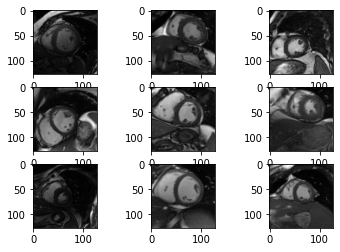

In [26]:
for i in range(3):
    plt.subplot(3,3,i+1)
    plt.imshow(img_train[:,:,i],cmap = "gray")

for i in range(3,6):
    plt.subplot(3,3,i+1)
    plt.imshow(img_valid[:,:,i],cmap = "gray")

for i in range(6,9):
    plt.subplot(3,3,i+1)
    plt.imshow(img_test[:,:,i],cmap = "gray")


### creating masks

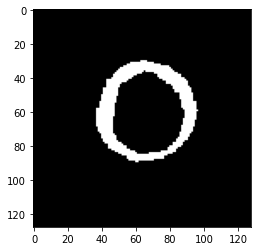

In [27]:
mask_train = epi_train - endo_train
mask_valid = epi_valid - endo_valid
mask_test = epi_test - endo_test
plt.imshow(mask_train[:,:,0],cmap = "gray")

### saving images

#### creating directory

In [ ]:
os.getcwd()

'H:\\data\\LVQuan19\\TrainingData_LVQuan19'

In [ ]:

os.mkdir("../imgFiles_last_framed0")
os.mkdir("../imgFiles_last_framed0/train_images")
os.mkdir("../imgFiles_last_framed0/train_masks")
os.mkdir("../imgFiles_last_framed0/val_images")
os.mkdir("../imgFiles_last_framed0/val_masks")
os.mkdir("../imgFiles_last_framed0/test_images")
os.mkdir("../imgFiles_last_framed0/test_masks")
os.mkdir("../imgFiles_last_framed0/train_images/train")
os.mkdir("../imgFiles_last_framed0/train_masks/train")
os.mkdir("../imgFiles_last_framed0/val_images/val")
os.mkdir("../imgFiles_last_framed0/val_masks/val")
os.mkdir("../imgFiles_last_framed0/test_images/test")
os.mkdir("../imgFiles_last_framed0/test_masks/test")

#### saving train images

In [41]:
# train
for i in range(img_train.shape[2]):
  cv2.imwrite("../imgFiles_last_framed0/train_images/train/train_"+"image"+ str(i) + ".jpg",img_train[:,:,i])
  cv2.imwrite("../imgFiles_last_framed0/train_masks/train/train_" + "mask" + str(i) +".png", mask_train[:,:,i])

#### saving validation images

In [42]:
# validation
for i in range(img_valid.shape[2]):
  cv2.imwrite("../imgFiles_last_framed0/val_images/val/val_"+"image"+ str(i) + ".jpg",img_valid[:,:,i])
  cv2.imwrite("../imgFiles_last_framed0/val_masks/val/val_" + "mask" + str(i) +".png", mask_valid[:,:,i])

#### saving test images

In [43]:
# test
for i in range(img_test.shape[2]):
  cv2.imwrite("../imgFiles_last_framed0/test_images/test/test_"+"image"+ str(i) + ".jpg",img_test[:,:,i])
  cv2.imwrite("../imgFiles_last_framed0/test_masks/test/test_" + "mask" + str(i) +".png", mask_test[:,:,i])

# my models

In [29]:
import tensorflow as tf
keras = tf.keras
from keras.layers import *

## resUnet

In [30]:
class ResBlock(Layer):
    """
    Represents the Residual Block in the ResUNet architecture.
    """
    def __init__(self, filters, strides, **kwargs):
        super(ResBlock, self).__init__(**kwargs)
        self.filters = filters
        self.strides = strides

        self.bn1 = BatchNormalization()
        self.relu1 = ReLU()
        self.conv1 = Conv2D(filters=filters, kernel_size=3, strides=strides, padding="same", use_bias=False)

        self.bn2 = BatchNormalization()
        self.relu2 = ReLU()
        self.conv2 = Conv2D(filters=filters, kernel_size=3, strides=1, padding="same", use_bias=False)

        self.conv_skip = Conv2D(filters=filters, kernel_size=1, strides=strides, padding="same", use_bias=False)
        self.bn_skip = BatchNormalization()

        self.add = Add()

    def call(self, inputs, training=False, **kwargs):
        x = inputs
        x = self.bn1(x, training=training)
        x = self.relu1(x)
        x = self.conv1(x)

        x = self.bn2(x, training=training)
        x = self.relu2(x)
        x = self.conv2(x)

        skip = self.conv_skip(inputs)
        skip = self.bn_skip(skip, training=training)

        res = self.add([x, skip])
        return res

    def get_config(self):
        return dict(filters=self.filters, strides=self.strides, **super(ResBlock, self).get_config())

In [31]:

import math


def ResUNet(input_shape, classes: int, filters_root: int = 64, depth: int = 3):
    """
    Builds ResUNet model.
    :param input_shape: Shape of the input images (h, w, c). Note that h and w must be powers of 2.
    :param classes: Number of classes that will be predicted for each pixel. Number of classes must be higher than 1.
    :param filters_root: Number of filters in the root block.
    :param depth: Depth of the architecture. Depth must be <= min(log_2(h), log_2(w)).
    :return: Tensorflow model instance.
    """
    if classes < 1:
        raise ValueError("The number of classes must be larger than 1.")
    if not math.log(input_shape[0], 2).is_integer() or not math.log(input_shape[1], 2):
        raise ValueError(f"Input height ({input_shape[0]}) and width ({input_shape[1]}) must be power of two.")
    if 2 ** depth > min(input_shape[0], input_shape[1]):
        raise ValueError(f"Model has insufficient height ({input_shape[0]}) and width ({input_shape[1]}) compared to its desired depth ({depth}).")

    input = Input(shape=input_shape)

    layer = input

    # ENCODER
    encoder_blocks = []

    filters = filters_root
    layer = Conv2D(filters=filters, kernel_size=3, strides=1, padding="same")(layer)

    branch = Conv2D(filters=filters, kernel_size=3, strides=1, padding="same", use_bias=False)(layer)
    branch = BatchNormalization()(branch)
    branch = ReLU()(branch)
    branch = Conv2D(filters=filters, kernel_size=3, strides=1, padding="same", use_bias=True)(branch)
    layer = Add()([branch, layer])

    encoder_blocks.append(layer)

    for _ in range(depth - 1):
        filters *= 2
        layer = ResBlock(filters, strides=2)(layer)

        encoder_blocks.append(layer)

    # BRIDGE
    filters *= 2
    layer = ResBlock(filters, strides=2)(layer)

    # DECODER
    for i in range(1, depth + 1):
        filters //= 2
        skip_block_connection = encoder_blocks[-i]

        layer = UpSampling2D()(layer)
        layer = Concatenate()([layer, skip_block_connection])
        layer = ResBlock(filters, strides=1)(layer)

    layer = Conv2D(filters=classes, kernel_size=1, strides=1, padding="same")(layer)

    if classes == 1:
        layer = Activation(activation="sigmoid")(layer)
    else:
        layer = Softmax()(layer)

    output = layer

    return keras.Model(input, output)

# model metrics

In [32]:
from keras import backend as K
#custom loss and metrics functions
def iou(y_true, y_pred, smooth=1):
	intersection = K.sum(K.abs(y_true * y_pred), axis=[1,2,3])
	union = K.sum(y_true,[1,2,3])+K.sum(y_pred,[1,2,3])-intersection
	iou = K.mean((intersection + smooth) / (union + smooth), axis=0)
	return iou

def F1(y_true, y_pred, smooth=1):
	intersection = K.sum(y_true * y_pred, axis=[1,2,3])
	union = K.sum(y_true, axis=[1,2,3]) + K.sum(y_pred, axis=[1,2,3])
	dice = K.mean((2. * intersection + smooth)/(union + smooth), axis=0)
	return dice

def recall(y_true, y_pred):
	true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
	possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
	recall = true_positives / (possible_positives + K.epsilon())
	return recall

def precision(y_true, y_pred):
	true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
	predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
	precision = true_positives / (predicted_positives + K.epsilon())
	return precision

def dice_coef(y_true, y_pred, smooth = 0.00001):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)


def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)



# model for just dataset

In [48]:
seed = 123
batch_size = 8

In [49]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [50]:
seed = 123
batch_size = 8
img_data_gen_args = dict(rescale= 1/255.)
image_data_generator = ImageDataGenerator(**img_data_gen_args)

mask_data_gen_args = dict(preprocessing_function = lambda x: np.where(x>0,1,0).astype(x.dtype))
mask_data_generator = ImageDataGenerator(**mask_data_gen_args)

### generators

In [51]:
gen_img_train = image_data_generator.flow_from_directory("../imgFiles_last_framed0/train_images/",
                                                           seed = seed,
                                                           batch_size = batch_size,target_size = (128,128),
                                                           color_mode = "grayscale",class_mode = None,
                                                         )
gen_mask_train = mask_data_generator.flow_from_directory("../imgFiles_last_framed0/train_masks/",
                                                         seed = seed,
                                                         batch_size = batch_size,target_size = (128,128),
                                                         color_mode = "grayscale",class_mode = None)


Found 39 images belonging to 1 classes.
Found 39 images belonging to 1 classes.


In [52]:
gen_img_valid = image_data_generator.flow_from_directory("../imgFiles_last_framed0/val_images/",
                                                           seed = seed,
                                                           batch_size = batch_size,target_size = (128,128),
                                                           color_mode = "grayscale",class_mode = None)
gen_mask_valid = mask_data_generator.flow_from_directory("../imgFiles_last_framed0/val_masks/",
                                                         seed = seed,
                                                         batch_size = batch_size,target_size = (128,128),
                                                         color_mode = "grayscale",class_mode = None)


Found 8 images belonging to 1 classes.
Found 8 images belonging to 1 classes.


In [53]:
gen_img_test = image_data_generator.flow_from_directory("../imgFiles_last_framed0/test_images/",
                                                           seed = seed,
                                                           batch_size = batch_size,target_size = (128,128),
                                                           color_mode = "grayscale",class_mode = None)
gen_mask_test = mask_data_generator.flow_from_directory("../imgFiles_last_framed0/test_masks/",
                                                         seed = seed,
                                                         batch_size = batch_size,target_size = (128,128),
                                                         color_mode = "grayscale",class_mode = None)


Found 9 images belonging to 1 classes.
Found 9 images belonging to 1 classes.


In [54]:
def my_image_generator(image_data_generator,mask_data_generator):
    gen = zip(image_data_generator,mask_data_generator)
    for img,mask in gen:
        yield img,mask

gen_train = my_image_generator(gen_img_train,gen_mask_train)
gen_valid = my_image_generator(gen_img_valid,gen_mask_valid)
gen_test = my_image_generator(gen_img_test, gen_mask_test)

## modeling

In [55]:
callbacks_resunet_no_frame0 = [
    keras.callbacks.EarlyStopping(patience=10, verbose = 1),
    keras.callbacks.ReduceLROnPlateau(factor = 0.1, patience=5, min_lr = 1e-5, verbose = 1),
    keras.callbacks.ModelCheckpoint("resUnet_last_no_frame0_augmentation_segmentation.h5",verbose = 1,maoniter = "val_loss", save_best_only = True)
]

In [56]:
resunet_no_frame0 = ResUNet(input_shape=(128, 128, 1), classes=1, filters_root=8, depth=4)

In [57]:
resunet_no_frame0.compile(optimizer= "adam", loss = "binary_crossentropy",
               metrics = ["accuracy",iou,dice_coef,F1,recall,precision])


## model fitting

In [58]:
num_train_imgs = len(os.listdir("../imgFiles_last_framed0/train_images/train"))
num_valid_imgs = len(os.listdir("../imgFiles_last_framed0/val_images/val"))
step_per_epoch = num_train_imgs//batch_size
step_per_epoch_valid = num_valid_imgs//batch_size

print(f"step: {step_per_epoch}")
print(f"step: {step_per_epoch_valid}")

if step_per_epoch_valid == 0:
    step_per_epoch_valid = 1

print(f"step: {step_per_epoch}")
print(f"step: {step_per_epoch_valid}")

step: 4
step: 1
step: 4
step: 1


In [59]:
resunet_no_frame0= resunet_no_frame0.fit_generator(gen_train,
          # batch_size = batch_size,
          validation_data = gen_valid,
          steps_per_epoch = step_per_epoch,
          validation_steps = step_per_epoch_valid,
          epochs = 120,callbacks = [callbacks_resunet_no_frame0])# 

C:\Users\foad\AppData\Local\Temp\ipykernel_9816\1329172474.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  resunet_no_frame0= resunet_no_frame0.fit_generator(gen_train,


Epoch 1/120
4/4 [==============================] - ETA: 0s - loss: 0.3331 - accuracy: 0.8784 - iou: 0.0686 - dice_coef: 0.1294 - F1: 0.1267 - recall: 0.1700 - precision: 0.1371
Epoch 1: val_loss improved from inf to 0.63059, saving model to resUnet_last_no_frame0_augmentation_segmentation.h5
4/4 [==============================] - 101s 3s/step - loss: 0.3331 - accuracy: 0.8784 - iou: 0.0686 - dice_coef: 0.1294 - F1: 0.1267 - recall: 0.1700 - precision: 0.1371 - val_loss: 0.6306 - val_accuracy: 0.7163 - val_iou: 0.0559 - val_dice_coef: 0.1062 - val_F1: 0.1053 - val_recall: 0.6976 - val_precision: 0.1178 - lr: 0.0010
Epoch 2/120
4/4 [==============================] - ETA: 0s - loss: 0.1861 - accuracy: 0.9485 - iou: 0.0872 - dice_coef: 0.1628 - F1: 0.1587 - recall: 0.0802 - precision: 0.4580
Epoch 2: val_loss did not improve from 0.63059
4/4 [==============================] - 4s 706ms/step - loss: 0.1861 - accuracy: 0.9485 - iou: 0.0872 - dice_coef: 0.1628 - F1: 0.1587 - recall: 0.0802 - p

In [ ]:
np.save("foadsavedmodelnonfull.npy",resunet_no_frame0)

In [60]:
best_resunet_last_no = tf.keras.models.load_model("resUnet_last_no_frame0_augmentation_segmentation.h5",
                                        custom_objects={
                                            "ResBlock": ResBlock,
                                            "F1": F1,
                                            "recall":recall,
                                            "precision":precision,
                                            "dice_coef_loss":dice_coef_loss,
                                                        "iou":iou,
                                                        "dice_coef":dice_coef})

In [61]:
metrics = best_resunet_last_no.evaluate(gen_test,steps = gen_img_test.n//batch_size,verbose = 1)
print(metrics)

1/1 [==============================] - 1s 936ms/step - loss: 0.1841 - accuracy: 0.9413 - iou: 0.0576 - dice_coef: 0.1095 - F1: 0.1081 - recall: 0.0000e+00 - precision: 0.0000e+00
[0.1840769350528717, 0.9412918090820312, 0.05755377560853958, 0.10946305096149445, 0.10810574889183044, 0.0, 0.0]


1/1 [==============================] - 0s 27ms/step


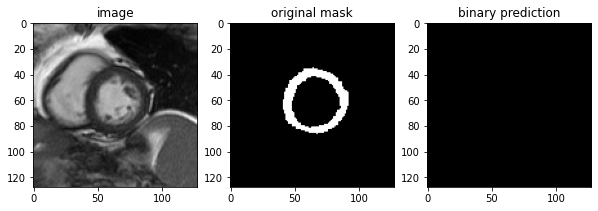

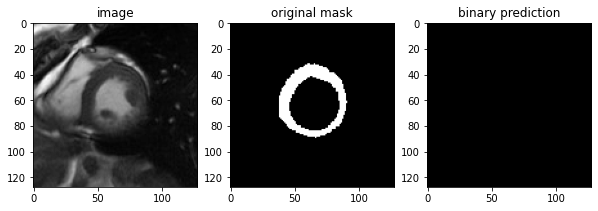

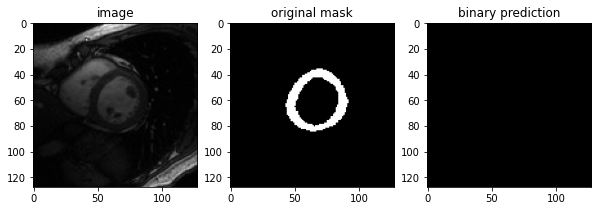

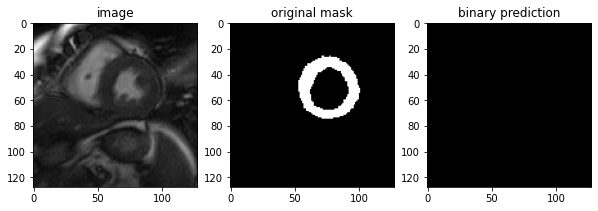

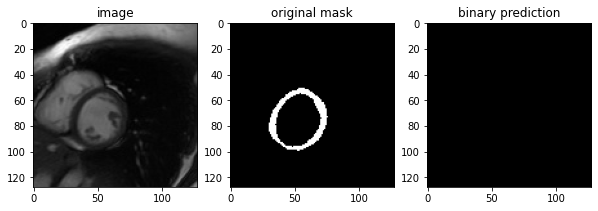

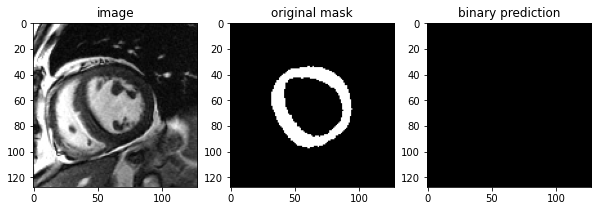

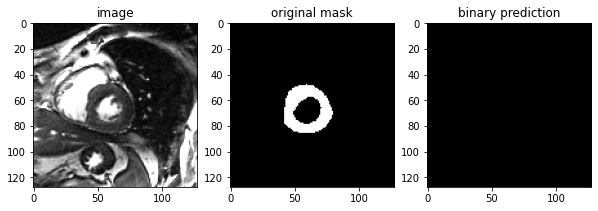

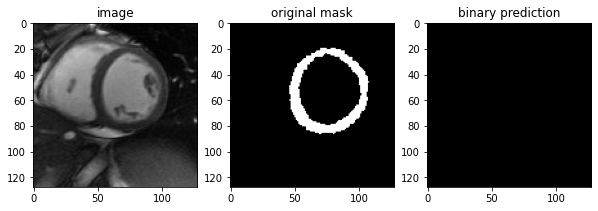

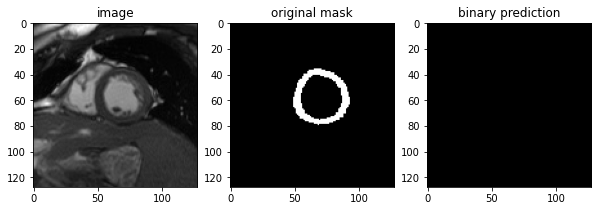

In [238]:
test_dir_img = "../imgFiles_last_framed0/test_images/test"
test_dir_msk = "../imgFiles_last_framed0/test_masks/test"
ifs_test = os.listdir(test_dir_img)
mfs_test = os.listdir(test_dir_msk)
ifs = [test_dir_img+"/"+i for i in ifs_test]
mfs = [test_dir_msk+"/"+i for i in mfs_test]
#ifs
for im,ms in zip(ifs,mfs):
    _img = cv2.imread(im,0)/255
    _msk = cv2.imread(ms,0)/255
    _img = _img[np.newaxis,:,:]
    pred = best_resunet_last_no.predict(_img)
    plt.figure(figsize = (10,10))
    plt.subplot(1,3,1)
    plt.imshow(np.squeeze(_img),cmap = "gray")
    plt.title("image")

    plt.subplot(1,3,2)
    plt.imshow(np.squeeze(_msk),cmap = "gray")
    plt.title('original mask')

    plt.subplot(1,3,3)
    plt.imshow(np.squeeze(pred)>0.5,cmap = "gray")
    plt.title('binary prediction')


# modelling using data augmentation

h:\mega\university files(allameh)\term6\deeplearning\final_codes\TPS.py:6: RuntimeWarning: divide by zero encountered in log
  return (x **2) * np.where(x<_small,0,np.log(x**2))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


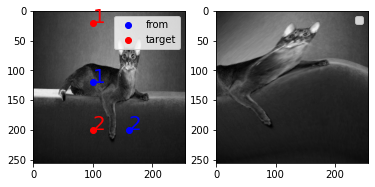

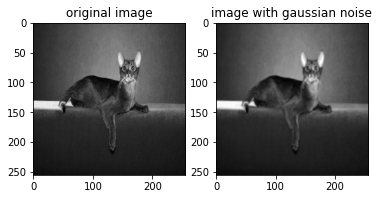

In [28]:
import numpy as np
import matplotlib.pyplot as plt

import rpy2.robjects.numpy2ri
rpy2.robjects.numpy2ri.activate()

from final_codes.saving_images import image_frame
from final_codes.plotShapes import plotShapes
from final_codes.landmark_extractor import landmarks,landmark_extractor

from final_codes.ASM import ASM
from final_codes.shape_simulation import simulator,distance
from final_codes.TPS import thin_plate_spline_warp

rpy2.robjects.numpy2ri.activate()

class landmarks:
    def __init__(self,img, n = 18):
        mark = landmark_extractor(img,nmark = n)
        self.coord =np.array(mark.rx2["coord"]) * 256
        self.x_center = np.array(mark.rx2["x_center"]) * 256
        self.y_center = np.array(mark.rx2["y_center"]) * 256
    
    def plot(self,**kwargs):
        plotShapes(self.coord,self.x_center,self.y_center,**kwargs)

def simulator2(proc):
    mshape = np.array(proc.rx2["mshape"])
    rotated = np.array(proc.rx2["rotated"])
    k = mshape.shape[0]
    n = rotated.shape[2] # number of samples
    mshape2 = np.r_[mshape[:,0],mshape[:,1]]
    d = np.zeros((np.prod(mshape.shape),n))
    for i in range(n):
        xx = np.r_[rotated[:,0,i],rotated[:,1,i]]
        d[:,i] = xx - mshape2
    
    sigma = 1.0/56 * np.matmul(d,d.transpose())
    sample = np.random.multivariate_normal(mean = mshape2,cov = sigma)
    sample2 = np.c_[sample[:k],sample[k:]]
    return sample2


In [29]:
# train
my_files = np.array(os.listdir())
my_files = my_files[[i.endswith(".mat") for i in my_files]]

# train
rr = np.concatenate([rand_choices,rand_valid])
img_train,epi_train,endo_train = read_from_files(my_files[rr],frame = 0,crop = False)

# validation
# img_valid,epi_valid,endo_valid = read_from_files(my_files[rand_valid],frame = 0)

# test
# img_test,epi_test,endo_test = read_from_files(my_files[rand_test], frame = 0)

(256, 256, 0)
patient5.mat
patient11.mat
patient51.mat
patient27.mat
patient39.mat
patient4.mat
patient42.mat
patient45.mat
patient54.mat
patient48.mat
patient53.mat
patient29.mat
patient44.mat
patient47.mat
patient19.mat
patient12.mat
patient31.mat
patient6.mat
patient41.mat
patient33.mat
patient50.mat
patient8.mat
patient34.mat
patient40.mat
patient21.mat
patient3.mat
patient52.mat
patient37.mat
patient25.mat
patient56.mat
patient38.mat
patient30.mat
patient13.mat
patient22.mat
patient36.mat
patient35.mat
patient55.mat
patient46.mat
patient26.mat
patient32.mat
patient16.mat
patient17.mat
patient1.mat
patient23.mat
patient15.mat
patient10.mat
patient24.mat


In [30]:
img_train.shape

(256, 256, 47)

In [31]:
# Point distribution model

import rpy2.robjects as robj
from rpy2.robjects.packages import importr
import rpy2.robjects.numpy2ri
rpy2.robjects.numpy2ri.activate()

Rshapes = importr("shapes")

In [32]:
n_landmark = 20


epi_frame = np.zeros(shape = (n_landmark,2,epi_train.shape[2]))
epi_x_center = np.zeros(shape = (epi_train.shape[2]))
epi_y_center = np.zeros(shape = (epi_train.shape[2]))

endo_frame = np.zeros(shape = (n_landmark,2,endo_train.shape[2]))
endo_x_center = np.zeros(shape = (endo_train.shape[2]))
endo_y_center = np.zeros(shape = (endo_train.shape[2]))


In [33]:

for i in range(endo_train.shape[2]):
    epi = landmarks(epi_train[:,:,i],n=n_landmark)
    epi_frame[:,:,i] = epi.coord
    epi_x_center[i] = epi.x_center
    epi_y_center[i] = epi.y_center

    endo = landmarks(endo_train[:,:,i],n = n_landmark)
    endo_frame[:,:,i] = endo.coord
    endo_x_center[i] = endo.x_center
    endo_y_center[i] = endo.y_center


In [34]:
mask_train = epi_train - endo_train
frame = np.concatenate([epi_frame,endo_frame])

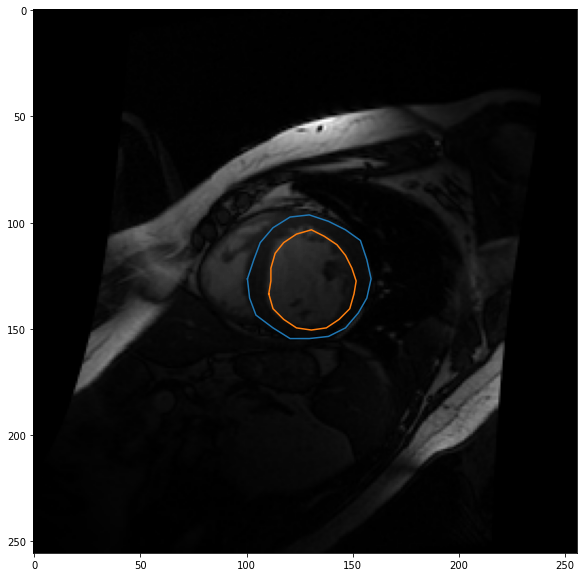

In [35]:
plt.figure(figsize = (10,10))
plt.imshow(img_train[:,:,0],cmap = "gray")
plotShapes(epi_frame[:,:,0],x_center=epi_x_center[0],y_center=epi_y_center[0])
plotShapes(endo_frame[:,:,0],x_center=endo_x_center[0],y_center=endo_y_center[0])
plt.show()

In [36]:

frame = np.concatenate((epi_frame,endo_frame))
proc,joinline = ASM(frame)
print(proc.names)
# Rshapes.shapepca(proc,joinline =  joinline,type = "r",pcno = np.array([1,2,3]))

 [1] "k"         "m"         "n"         "rotated"   "tan"       "pcar"     
 [7] "scores"    "rawscores" "pcasd"     "percent"   "size"      "rho"      
[13] "rmsrho"    "rmsd1"     "mshape"    "stdscores" "GSS"      



## augmentation function

In [37]:
def augment(proc,frame,df_image,df_epi,df_endo):
  def create_simulation(proc,frame):
    d = np.zeros(frame.shape[2])
    while True:
        my_sim = simulator2(proc)
        for i in range(df_image.shape[2]):
            # d[i] = mahalanobis(my_sim.reshape(-1),frame[:,:,i].reshape(-1),cov)
            d[i] = distance(my_sim,frame[:,:,i])
        
        if d.min()<100:
            return my_sim,d
    
  my_sim,d = create_simulation(proc,frame)
  idx = np.where(d == d.min())[0][0]


  img2 = thin_plate_spline_warp(df_image[:,:,idx],frame[:,:,idx],my_sim)
  img2 = img2/img2.max()
  epi2 = thin_plate_spline_warp(df_epi[:,:,idx],frame[:,:,idx],my_sim)
  # epi2 = epi2/epi2.max()
  endo2 = thin_plate_spline_warp(df_endo[:,:,idx],frame[:,:,idx],my_sim)
  return img2, epi2,endo2,idx



29


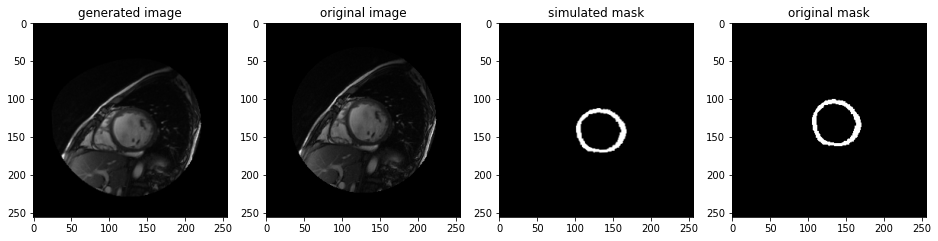

In [44]:
a1,a2,a3,a4 = augment(proc,frame,img_train,epi_train,endo_train)
plt.figure(figsize = (16,4))
plt.subplot(141)
plt.imshow(a1,cmap = "gray")
plt.title("generated image")

plt.subplot(142)
plt.imshow(img_train[:,:,a4],cmap = "gray")
plt.title("original image")

plt.subplot(143)
plt.imshow(a2 - a3,cmap = "gray")
plt.title("simulated mask")
plt.subplot(144)
plt.imshow(epi_train[:,:,a4]- endo_train[:,:,a4],cmap = "gray")
plt.title("original mask")

print(a4)



In [250]:
a1,a2,a3,a4 = augment(proc,frame,img_train,epi_train,endo_train)


(145, 119)
145


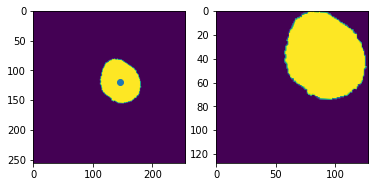

In [251]:
plt.subplot(121)
plt.imshow(a2)
a2_m = cv2.moments(a2)
cx = np.round(a2_m["m10"]/a2_m["m00"]).astype("int")
cy = np.round(a2_m["m01"]/a2_m["m00"]).astype("int")
print((cx,cy))
print(cx)
plt.scatter(cx,cy)

cxx= cx - 64
cxxx = cx +64

cyy = cy - 64
cyyy = cy+64

plt.subplot(122)
plt.imshow(a2[cxx:cxxx,cyy:cyyy])




(128, 128)


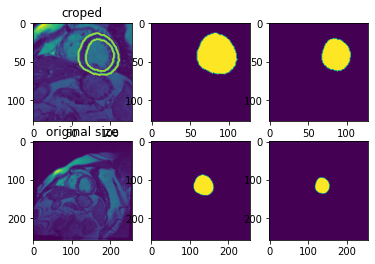

In [252]:
a1,a2,a3,a4 = augment(proc,frame,img_train,epi_train,endo_train)
b1,b2,b3,b4 = find_roi(a1,a2,a3)
print(b1.shape)

plt.subplot(231)
bb= b3 - b2
plt.imshow(b1)
plt.title("croped")
plt.contour(bb)
plt.subplot(232)
plt.imshow(b2)
plt.subplot(233)
plt.imshow(b3)

plt.subplot(234)
plt.imshow(a1)
plt.title("original size")
plt.subplot(235)
plt.imshow(a2)
plt.subplot(236)
plt.imshow(a3)


## saving augmentation

In [253]:
def create_augmen_100():
  
  try:
    aug_img = []
    aug_mask = []
    i=0
    while i < 100:
      aug_i,aug_ep,aug_en,_= augment(proc,frame,img_train,epi_train,endo_train) # frame is the landmarks and mask is the image of mask.
      aug_img_roi,aug_epi_roi,aug_endo_roi,_ = find_roi(aug_i,aug_ep,aug_en)
      if (np.sum(aug_img_roi.shape) < 250 or np.sum(aug_epi_roi.shape)<250 or np.sum(aug_endo_roi) < 250):
          i = i - 1
          # print("another created!!!",end = " ")
          continue
      aug_m =aug_epi_roi - aug_endo_roi
      aug_img.append(aug_img_roi * 255)
      aug_mask.append(aug_m * 255)
      i+=1
    print(f"{100} image created suceccfully!")
    return aug_img,aug_mask
  except:
    pass

In [254]:
def save_augmen_100(aug_img,aug_mask,idx):
    for j in range(100):
        #print(f"\nj is :{j}",end = "\t")
        #print(f"{aug_mask[j].shape}",end = " ")
        cv2.imwrite("../imgFiles_last_framed0/train_images/train/frame0_augm"+"image"+ str(idx) + "_"  + str(j) + ".jpg",aug_img[j])
        cv2.imwrite("../imgFiles_last_framed0/train_masks/train/frame0_augm" + "mask" + str(idx)+ "_" +str(j) +".png", aug_mask[j])
    print(f"{100} image saved suceccfully!")

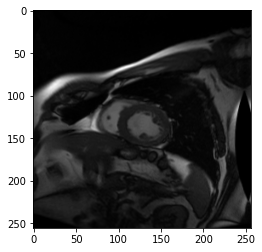

In [255]:
a1,_,_,_ = augment(proc,frame,img_train,epi_train,endo_train)
plt.imshow(a1,cmap = "gray")

In [256]:
cv2.imwrite("foad.jpg",a1*255)

True

In [257]:
for i in range(10):
    try:
        img,msk = create_augmen_100()
        save_augmen_100(img,msk,i)
        print(f"{i}-----------------------------------")
    except:
        pass

100 image created suceccfully!
100 image saved suceccfully!
0-----------------------------------
100 image created suceccfully!
100 image saved suceccfully!
1-----------------------------------
100 image created suceccfully!
100 image saved suceccfully!
2-----------------------------------
100 image created suceccfully!
100 image saved suceccfully!
3-----------------------------------
100 image created suceccfully!
100 image saved suceccfully!
4-----------------------------------
100 image created suceccfully!
100 image saved suceccfully!
5-----------------------------------
100 image created suceccfully!
100 image saved suceccfully!
6-----------------------------------
100 image created suceccfully!
100 image saved suceccfully!
7-----------------------------------
100 image created suceccfully!
100 image saved suceccfully!
8-----------------------------------
100 image created suceccfully!
100 image saved suceccfully!
9-----------------------------------


In [258]:
# adding 100 image to validation

img,msk = create_augmen_100()
for j in range(100):
    #print(f"\nj is :{j}",end = "\t")
    #print(f"{aug_mask[j].shape}",end = " ")
    cv2.imwrite("../imgFiles_last_framed0/val_images/val/frame0_augm"+"image"+ str(j) + "_"  + str(j) + ".jpg",img[j])
    cv2.imwrite("../imgFiles_last_framed0/val_masks/val/frame0_augm" + "mask" + str(j)+ "_" +str(j) +".png", msk[j])
    
print(f"{100} image saved suceccfully!")

100 image created suceccfully!
100 image saved suceccfully!


In [259]:
len(os.listdir("../imgFiles_last_framed0/train_images/train"))

1039

In [260]:
seed = 123
batch_size = 8

In [261]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [262]:
seed = 123
batch_size = 8
img_data_gen_args = dict(rescale= 1/255.)
image_data_generator = ImageDataGenerator(**img_data_gen_args)

mask_data_gen_args = dict(preprocessing_function = lambda x: np.where(x>0,1,0).astype(x.dtype))
mask_data_generator = ImageDataGenerator(**mask_data_gen_args)

In [263]:
gen_img_train = image_data_generator.flow_from_directory("../imgFiles_last_framed0/train_images/",
                                                           seed = seed,
                                                           batch_size = batch_size,target_size = (128,128),
                                                           color_mode = "grayscale",class_mode = None,
                                                         )
gen_mask_train = mask_data_generator.flow_from_directory("../imgFiles_last_framed0/train_masks/",
                                                         seed = seed,
                                                         batch_size = batch_size,target_size = (128,128),
                                                         color_mode = "grayscale",class_mode = None)


Found 1039 images belonging to 1 classes.
Found 1039 images belonging to 1 classes.


In [264]:
gen_img_valid = image_data_generator.flow_from_directory("../imgFiles_last_framed0/val_images/",
                                                           seed = seed,
                                                           batch_size = batch_size,target_size = (128,128),
                                                           color_mode = "grayscale",class_mode = None)
gen_mask_valid = mask_data_generator.flow_from_directory("../imgFiles_last_framed0/val_masks/",
                                                         seed = seed,
                                                         batch_size = batch_size,target_size = (128,128),
                                                         color_mode = "grayscale",class_mode = None)


Found 108 images belonging to 1 classes.
Found 108 images belonging to 1 classes.


In [265]:
gen_img_test = image_data_generator.flow_from_directory("../imgFiles_last_framed0/test_images/",
                                                           seed = seed,
                                                           batch_size = batch_size,target_size = (128,128),
                                                           color_mode = "grayscale",class_mode = None)
gen_mask_test = mask_data_generator.flow_from_directory("../imgFiles_last_framed0/test_masks/",
                                                         seed = seed,
                                                         batch_size = batch_size,target_size = (128,128),
                                                         color_mode = "grayscale",class_mode = None)


Found 9 images belonging to 1 classes.
Found 9 images belonging to 1 classes.


In [266]:
def my_image_generator(image_data_generator,mask_data_generator):
  gen = zip(image_data_generator,mask_data_generator)
  for img,mask in gen:
    yield img,mask

gen_train = my_image_generator(gen_img_train,gen_mask_train)
gen_valid = my_image_generator(gen_img_valid,gen_mask_valid)
gen_test = my_image_generator(gen_img_test, gen_mask_test)

In [267]:
callbacks_resunet_frame_yes = [
    keras.callbacks.EarlyStopping(patience=10, verbose = 1),
    keras.callbacks.ReduceLROnPlateau(factor = 0.1, patience=5, min_lr = 1e-5, verbose = 1),
    keras.callbacks.ModelCheckpoint("resUnet_last_frame0_yes_augmentation_segmentation.h5",verbose = 1,maoniter = "val_loss", save_best_only = True)
]

In [268]:
resunet_yes = ResUNet(input_shape=(128, 128, 1), classes=1, filters_root=8, depth=4)
resunet_yes.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_284 (Conv2D)            (None, 128, 128, 8)  80          ['input_6[0][0]']                
                                                                                                  
 conv2d_285 (Conv2D)            (None, 128, 128, 8)  576         ['conv2d_284[0][0]']             
                                                                                                  
 batch_normalization_269 (Batch  (None, 128, 128, 8)  32         ['conv2d_285[0][0]']       

In [269]:
resunet_yes.compile(optimizer= "adam", loss = "binary_crossentropy",
               metrics = ["accuracy",iou,dice_coef,F1,recall,precision])

In [270]:
num_train_imgs = len(os.listdir("../imgFiles_last_framed0/train_images/train"))
num_valid_imgs = len(os.listdir("../imgFiles_last_framed0/val_images/val"))
step_per_epoch = num_train_imgs//batch_size
step_per_epoch_valid = num_valid_imgs//batch_size

print(f"step: {step_per_epoch}")
print(f"step: {step_per_epoch_valid}")

resault_resunet_yes= resunet_yes.fit_generator(gen_train,
          # batch_size = batch_size,
          validation_data = gen_valid,
          steps_per_epoch = step_per_epoch,
          validation_steps = step_per_epoch_valid,
          epochs = 120,callbacks = [callbacks_resunet_frame_yes])# 

step: 129
step: 13
Epoch 1/120


C:\Users\foad\AppData\Local\Temp\ipykernel_7084\3282240362.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  resault_resunet_yes= resunet_yes.fit_generator(gen_train,


129/129 [==============================] - ETA: 0s - loss: 0.1169 - accuracy: 0.9583 - iou: 0.4132 - dice_coef: 0.5705 - F1: 0.5529 - recall: 0.6773 - precision: 0.7446
Epoch 1: val_loss improved from inf to 0.22917, saving model to resUnet_last_frame0_yes_augmentation_segmentation.h5
129/129 [==============================] - 23s 151ms/step - loss: 0.1169 - accuracy: 0.9583 - iou: 0.4132 - dice_coef: 0.5705 - F1: 0.5529 - recall: 0.6773 - precision: 0.7446 - val_loss: 0.2292 - val_accuracy: 0.9385 - val_iou: 0.0322 - val_dice_coef: 0.0624 - val_F1: 0.0614 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - lr: 0.0010
Epoch 2/120
129/129 [==============================] - ETA: 0s - loss: 0.0369 - accuracy: 0.9851 - iou: 0.6784 - dice_coef: 0.8161 - F1: 0.8033 - recall: 0.8802 - precision: 0.8800
Epoch 2: val_loss did not improve from 0.22917
129/129 [==============================] - 17s 133ms/step - loss: 0.0369 - accuracy: 0.9851 - iou: 0.6784 - dice_coef: 0.8161 - F1: 0.8033 - re

In [ ]:
np.save("foadfullmodel.npy",resault_resunet_yes)

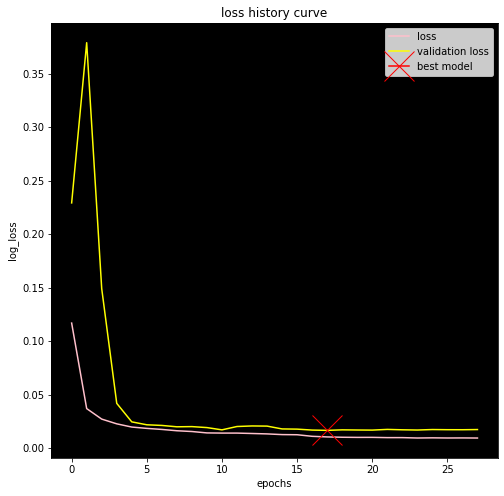

In [275]:
loss = resault_resunet_yes.history["loss"]
val_loss = resault_resunet_yes.history["val_loss"]
best_loss = np.argmin(resault_resunet_yes.history["val_loss"]),np.min(resault_resunet_yes.history["val_loss"])


steps = np.arange(len(loss))


plt.figure(figsize = (8,8))
ax = plt.axes()
ax.set_facecolor('black')
plt.title("loss history curve")
plt.plot(steps, loss, color = 'pink', label = "loss")
plt.plot(steps, val_loss, color = "yellow", label = "validation loss")
plt.plot(best_loss[0], best_loss[1], marker = 'x',markersize= 30,color = 'red', label = 'best model')
plt.xlabel('epochs')
plt.ylabel('log_loss')

plt.legend()
plt.show()

In [276]:
best_resunet_last_yes = tf.keras.models.load_model("resUnet_last_frame0_yes_augmentation_segmentation.h5",
                                        custom_objects={
                                            "ResBlock": ResBlock,
                                            "F1": F1,
                                            "recall":recall,
                                            "precision":precision,
                                            "dice_coef_loss":dice_coef_loss,
                                                        "iou":iou,
                                                        "dice_coef":dice_coef})

In [277]:
metrics = best_resunet_last_yes.evaluate(gen_test,steps = gen_img_test.n//batch_size,verbose = 1)
print(metrics)

1/1 [==============================] - 1s 989ms/step - loss: 0.1021 - accuracy: 0.9752 - iou: 0.6350 - dice_coef: 0.7771 - F1: 0.7642 - recall: 0.7584 - precision: 0.8080
[0.10207221657037735, 0.9752349853515625, 0.6349667906761169, 0.7770528197288513, 0.7642258405685425, 0.7584145665168762, 0.8079745173454285]


1/1 [==============================] - 0s 42ms/step


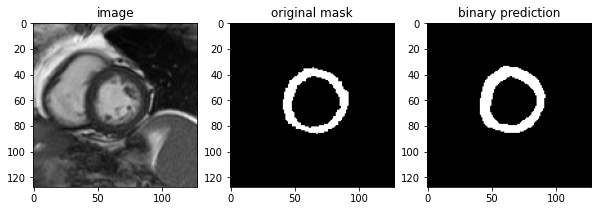

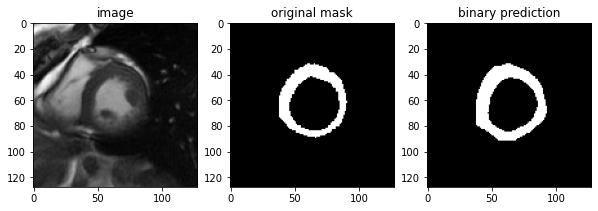

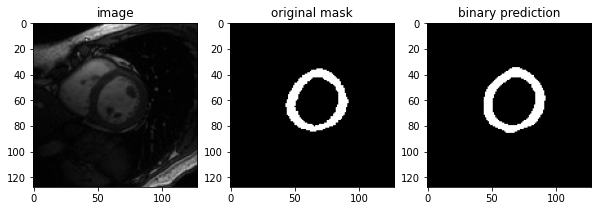

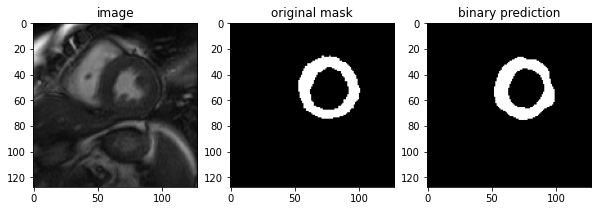

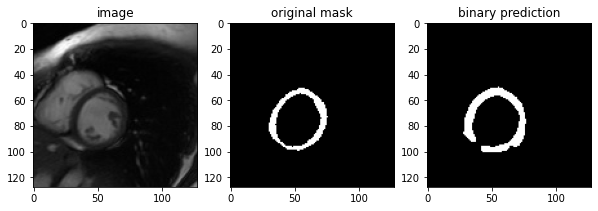

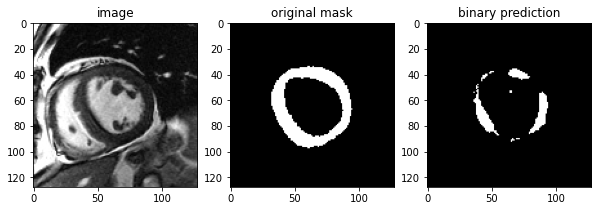

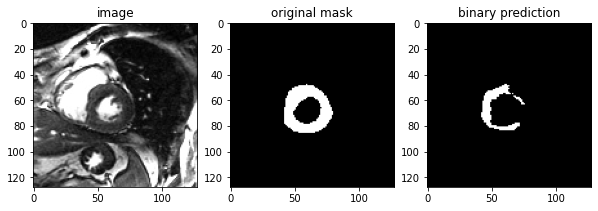

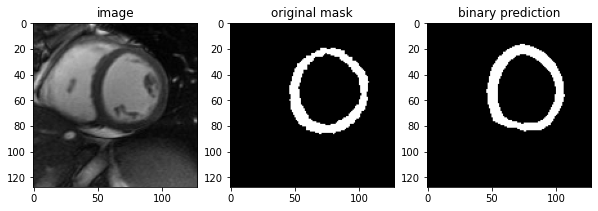

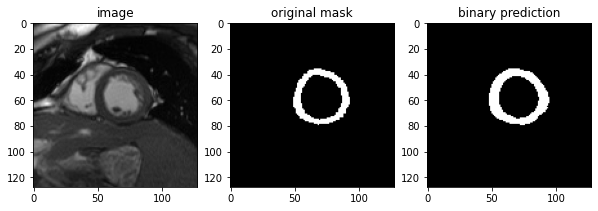

In [278]:
test_dir_img = "../imgFiles_last_framed0/test_images/test"
test_dir_msk = "../imgFiles_last_framed0/test_masks/test"
ifs_test = os.listdir(test_dir_img)
mfs_test = os.listdir(test_dir_msk)
ifs = [test_dir_img+"/"+i for i in ifs_test]
mfs = [test_dir_msk+"/"+i for i in mfs_test]
#ifs
for im,ms in zip(ifs,mfs):
    _img = cv2.imread(im,0)/255
    _msk = cv2.imread(ms,0)/255
    _img = _img[np.newaxis,:,:]
    pred = best_resunet_last_yes.predict(_img)
    plt.figure(figsize = (10,10))
    plt.subplot(1,3,1)
    plt.imshow(np.squeeze(_img),cmap = "gray")
    plt.title("image")

    plt.subplot(1,3,2)
    plt.imshow(np.squeeze(_msk),cmap = "gray")
    plt.title('original mask')

    plt.subplot(1,3,3)
    plt.imshow(np.squeeze(pred)>0.5,cmap = "gray")
    plt.title('binary prediction')
